# Analisis Perbandingan Metode Data Mining untuk Memprediksi Prestasi Akademik Mahasiswa

## Pemahaman Dataset dan Tujuan Penelitian

### Deskripsi Dataset

Penelitian ini menggunakan Student Performance Dataset yang bersumber dari dataset [Kaggle bernama Student Performance Dataset](https://www.kaggle.com/datasets/waqi786/student-performance-dataset). Dataset ini terdiri dari `5.000 baris` data dan `21 kolom`, yang mencakup informasi komprehensif tentang performa akademik, kebiasaan belajar, faktor psikologis, dan latar belakang sosial-ekonomi mahasiswa. Kolom-kolom dalam dataset meliputi:

`Variabel Akademik`: Attendance (%), Midterm_Score, Final_Score, Assignments_Avg, Quizzes_Avg, Participation_Score, Projects_Score, dan Total_Score (variabel target).

`Variabel Perilaku`: Study_Hours_per_Week, Sleep_Hours_per_Night, dan Extracurricular_Activities (Yes/No).

`Variabel Psikologis`: Stress_Level (skala 1-10).

`Variabel Demografis dan Sosial-Ekonomi`: Student_ID, First_Name, Last_Name, Email, Gender, Age, Department, Parent_Education_Level, Family_Income_Level, dan Internet_Access_at_Home.

`Variabel Hasil`: Grade (kategorikal, A/B/C/D/F), yang merupakan turunan dari Total_Score dan tidak digunakan sebagai fitur dalam prediksi.

`Total_Score` adalah variabel kontinu yang merepresentasikan jumlah tertimbang dari semua nilai akademik mahasiswa, mencerminkan performa akademik secara keseluruhan. Dataset ini kaya akan fitur numerik dan kategorikal, sehingga cocok untuk analisis prediktif menggunakan pendekatan regresi.

### Tujuan Penelitian

Penelitian ini bertujuan untuk memprediksi `Total_Score` mahasiswa menggunakan lima metode regresi berbasis data mining, yaitu `Linear Regression`, `Ridge Regression`, `Random Forest Regressor`, `Gradient Boosting Regressor (XGBoost)`, dan `Support Vector Regression (SVR)`. Tujuan spesifik meliputi:

- Mengembangkan model prediktif untuk memperkirakan Total_Score berdasarkan fitur akademik, perilaku, psikologis, dan sosial-ekonomi.
- Membandingkan performa kelima metode regresi berdasarkan metrik evaluasi seperti Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), dan R² Score untuk menentukan model yang paling akurat dan efisien.
- Mengidentifikasi fitur utama yang paling memengaruhi Total_Score, seperti kehadiran (Attendance), nilai ujian tengah semester (Midterm_Score), atau jam belajar per minggu (Study_Hours_per_Week), untuk memberikan wawasan bagi institusi pendidikan dalam mendukung performa mahasiswa.

### Konteks dan Relevansi

Prediksi performa akademik mahasiswa memiliki nilai praktis yang tinggi, terutama untuk institusi pendidikan dalam mengidentifikasi faktor-faktor yang memengaruhi keberhasilan akademik dan merancang intervensi yang tepat, seperti program bimbingan atau dukungan belajar. Dengan membandingkan berbagai metode regresi, penelitian ini juga bertujuan untuk memberikan rekomendasi model terbaik yang dapat diimplementasikan dalam skenario dunia nyata, sekaligus memahami kelebihan dan keterbatasan masing-masing metode dalam konteks dataset ini.

## Import library & Dataset

In [69]:
import pandas as pd

In [70]:
data = pd.read_csv("dataset/Students_Grading_Dataset.csv")

data.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,83.49,C,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,92.29,F,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,93.55,F,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.03,A,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,90.91,A,13.3,Yes,No,Master's,Medium,6,4.5


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

## Preprocessing data

### Pemeriksaan dan Penanganan Missing Values

Tujuan
- Pemeriksaan Missing Values: Mengidentifikasi apakah ada nilai yang hilang pada kolom-kolom kunci seperti Total_Score, Attendance, Study_Hours_per_Week, dan kolom lainnya dalam dataset.
- Penanganan Missing Values:
  - Untuk fitur numerik (contoh: Midterm_Score, Assignments_Avg): Imputasi menggunakan mean atau median berdasarkan distribusi data.
  - Untuk fitur kategorikal (contoh: Gender, Department): Imputasi menggunakan mode (nilai yang paling sering muncul).
  - Jika missing values sangat sedikit (misalnya <1% dari total baris), pertimbangkan untuk menghapus baris yang memiliki nilai hilang.

In [72]:
# Menampilkan jumlah missing values per kolom
print("Jumlah Missing Values per Kolom:")
missing_values = data.isnull().sum()
missing_values

Jumlah Missing Values per Kolom:


Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                   0
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                  0
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1025
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

In [73]:
# Menampilkan persentase missing values per kolom
print("Persentase Missing Values per Kolom:")
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage

Persentase Missing Values per Kolom:


Student_ID                     0.0
First_Name                     0.0
Last_Name                      0.0
Email                          0.0
Gender                         0.0
Age                            0.0
Department                     0.0
Attendance (%)                 0.0
Midterm_Score                  0.0
Final_Score                    0.0
Assignments_Avg                0.0
Quizzes_Avg                    0.0
Participation_Score            0.0
Projects_Score                 0.0
Total_Score                    0.0
Grade                          0.0
Study_Hours_per_Week           0.0
Extracurricular_Activities     0.0
Internet_Access_at_Home        0.0
Parent_Education_Level        20.5
Family_Income_Level            0.0
Stress_Level (1-10)            0.0
Sleep_Hours_per_Night          0.0
dtype: float64

#### Insight:

Sebanyak 1025 dari 5000 data (20.5%) Parent_Education_Level memiliki missing value dan merupakan proporsi yang signifikan, sehingga perlu penanganan cermat.

Kolom ini bersifat kategorikal (dengan kategori seperti None, High School, Bachelor's, Master's, PhD), sehingga strategi penanganan harus sesuai untuk data kategorikal.

Persentase missing values yang tinggi menunjukkan bahwa penghapusan semua baris dengan missing values mungkin tidak ideal karena akan mengurangi jumlah data secara signifikan (hilangnya 1.025 baris atau 20,5% data).

#### Imputasi missing values dengan mode

In [74]:
if data['Parent_Education_Level'].isnull().sum() > 0:
    mode_value = data['Parent_Education_Level'].mode()[0]
    data['Parent_Education_Level'].fillna(mode_value, inplace=True)
    print(f"\nImputasi {data['Parent_Education_Level'].isnull().sum()} missing values pada Parent_Education_Level dengan mode: {mode_value}")

# Verifikasi distribusi setelah imputasi
print("\nDistribusi Parent_Education_Level Setelah Imputasi:")
print(data['Parent_Education_Level'].value_counts())
print("\nPersentase Distribusi Parent_Education_Level Setelah Imputasi:")
print(data['Parent_Education_Level'].value_counts() / len(data) * 100)

# Verifikasi bahwa tidak ada missing values tersisa
print("\nJumlah Missing Values Setelah Penanganan:")
print(data.isnull().sum())


Imputasi 0 missing values pada Parent_Education_Level dengan mode: Bachelor's

Distribusi Parent_Education_Level Setelah Imputasi:
Parent_Education_Level
Bachelor's     2045
PhD            1012
Master's       1000
High School     943
Name: count, dtype: int64

Persentase Distribusi Parent_Education_Level Setelah Imputasi:
Parent_Education_Level
Bachelor's     40.90
PhD            20.24
Master's       20.00
High School    18.86
Name: count, dtype: float64

Jumlah Missing Values Setelah Penanganan:
Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade            

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13160\1946876945.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Parent_Education_Level'].fillna(mode_value, inplace=True)


In [75]:
# 3.5. Simpan dataset yang telah diproses (opsional)
data.to_csv("dataset/dataset_cleaned.csv", index=False)

### Encoding Variabel Kategorikal

Tujuan
- Mengubah kolom kategorikal (Gender, Department, Parent_Education_Level, Family_Income_Level, Extracurricular_Activities, Internet_Access_at_Home) menjadi format numerik agar dapat digunakan oleh model regresi.
- Memastikan Grade tidak digunakan sebagai fitur karena merupakan turunan dari Total_Score.
- Menerapkan metode encoding yang sesuai:
  - One-Hot Encoding untuk kolom dengan kategori tidak berurutan (Gender, Department, Family_Income_Level).
  - Label Encoding untuk kolom ordinal Parent_Education_Level (None, High School, Bachelor's, Master's, PhD) jika urutan relevan.
  - Boolean Encoding untuk kolom biner (Extracurricular_Activities, Internet_Access_at_Home) yang hanya memiliki nilai Yes/No.

In [76]:
data = pd.read_csv("dataset/dataset_cleaned.csv")

In [77]:
# Mendefinisikan kolom kategorikal dan strategi encoding
categorical_columns = {
    'one_hot': ['Gender', 'Department', 'Family_Income_Level'],
    'label': ['Parent_Education_Level'],
    'boolean': ['Extracurricular_Activities', 'Internet_Access_at_Home']
}

In [78]:
# One-Hot Encoding untuk Gender, Department, Family_Income_Level
print("Melakukan One-Hot Encoding untuk kolom:", categorical_columns['one_hot'])
data = pd.get_dummies(data, columns=categorical_columns['one_hot'], prefix=categorical_columns['one_hot'], drop_first=True)

Melakukan One-Hot Encoding untuk kolom: ['Gender', 'Department', 'Family_Income_Level']


In [79]:
# Label Encoding untuk Parent_Education_Level
print("Melakukan Label Encoding untuk Parent_Education_Level")
parent_education_mapping = {
    'None': 0,
    'High School': 1,
    "Bachelor's": 2,
    "Master's": 3,
    'PhD': 4
}
data['Parent_Education_Level'] = data['Parent_Education_Level'].map(parent_education_mapping)

Melakukan Label Encoding untuk Parent_Education_Level


In [80]:
# Boolean Encoding untuk Extracurricular_Activities dan Internet_Access_at_Home
print("Melakukan Boolean Encoding untuk kolom:", categorical_columns['boolean'])
for col in categorical_columns['boolean']:
    data[col] = data[col].map({'Yes': 1, 'No': 0})
    print(f"\nDistribusi {col} Setelah Boolean Encoding:")
    print(data[col].value_counts())

Melakukan Boolean Encoding untuk kolom: ['Extracurricular_Activities', 'Internet_Access_at_Home']

Distribusi Extracurricular_Activities Setelah Boolean Encoding:
Extracurricular_Activities
1    2512
0    2488
Name: count, dtype: int64

Distribusi Internet_Access_at_Home Setelah Boolean Encoding:
Internet_Access_at_Home
1    2520
0    2480
Name: count, dtype: int64


In [81]:
# Memastikan Grade tidak digunakan sebagai fitur
print("Menghapus kolom Grade untuk mencegah data leakage")
if 'Grade' in data.columns:
    data = data.drop(columns=['Grade'])

# Verifikasi dataset setelah encoding
print("Informasi Dataset Setelah Encoding:")
data.info()

Menghapus kolom Grade untuk mencegah data leakage
Informasi Dataset Setelah Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Age                         5000 non-null   int64  
 5   Attendance (%)              5000 non-null   float64
 6   Midterm_Score               5000 non-null   float64
 7   Final_Score                 5000 non-null   float64
 8   Assignments_Avg             5000 non-null   float64
 9   Quizzes_Avg                 5000 non-null   float64
 10  Participation_Score         5000 non-null   float64
 11  Projects_Score              5000 non-null   float64
 12  Tota

In [82]:
data.to_csv("dataset/dataset_encoded.csv", index=False)

### Normalisasi/Standarisasi Fitur Numerik

Tujuan

- Mengubah skala fitur numerik (Attendance (%), Midterm_Score, Final_Score, Assignments_Avg, Quizzes_Avg, Participation_Score, Projects_Score, Study_Hours_per_Week, Sleep_Hours_per_Night, Age, Stress_Level) agar sesuai untuk model regresi, terutama model yang sensitif terhadap skala data seperti SVR dan Ridge Regression.
- Menerapkan StandardScaler (standarisasi ke mean=0, standar deviasi=1) sebagai metode utama.
- Menyediakan MinMaxScaler (skala ke rentang 0-1) sebagai alternatif untuk perbandingan atau kebutuhan spesifik.
- Memastikan bahwa fitur kategorikal yang telah diencode (misalnya, kolom One-Hot Encoding atau Label Encoding) tidak diubah skalanya.

In [83]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [84]:
data = pd.read_csv("dataset/dataset_encoded.csv")

In [85]:
numeric_columns = ['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 
                   'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 
                   'Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Age', 'Stress_Level (1-10)']

In [86]:
data[numeric_columns].describe()

,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Study_Hours_per_Week,Sleep_Hours_per_Night,Age,Stress_Level (1-10)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,75.356076,70.701924,69.546552,74.956320,74.836214,4.996372,74.78305,17.521140,6.514420,21.048400,5.507200
std,14.392716,17.436325,17.108996,14.404287,14.423848,2.898978,14.54243,7.193035,1.446155,1.989786,2.886662
min,50.010000,40.000000,40.010000,50.000000,50.000000,0.000000,50.00000,5.000000,4.000000,18.000000,1.000000
25%,62.945000,55.707500,54.697500,62.340000,62.357500,2.507500,61.97000,11.500000,5.300000,19.000000,3.000000
50%,75.670000,70.860000,69.485000,75.090000,74.905000,4.960000,74.54000,17.400000,6.500000,21.000000,6.000000
75%,87.862500,85.760000,83.922500,87.352500,87.292500,7.550000,87.63000,23.700000,7.800000,23.000000,8.000000
max,100.000000,99.990000,99.980000,99.990000,99.990000,10.000000,100.00000,30.000000,9.000000,24.000000,10.000000


#### Standarisasi dengan StandardScaler

In [87]:
print("Melakukan Standarisasi dengan StandardScaler untuk kolom:", numeric_columns)
scaler_standard = StandardScaler()
data_standard = data.copy()
data_standard[numeric_columns] = scaler_standard.fit_transform(data_standard[numeric_columns])

Melakukan Standarisasi dengan StandardScaler untuk kolom: ['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Age', 'Stress_Level (1-10)']


#### Normalisasi dengan MinMaxScaler

In [88]:
print("Melakukan Normalisasi dengan MinMaxScaler untuk kolom:", numeric_columns)
scaler_minmax = MinMaxScaler()
data_minmax = data.copy()
data_minmax[numeric_columns] = scaler_minmax.fit_transform(data_minmax[numeric_columns])

Melakukan Normalisasi dengan MinMaxScaler untuk kolom: ['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Age', 'Stress_Level (1-10)']


In [89]:
# Verifikasi statistik deskriptif setelah standarisasi
print("Statistik Deskriptif Fitur Numerik Setelah Standarisasi (StandardScaler):")
print(data_standard[numeric_columns].describe())

# Verifikasi statistik deskriptif setelah normalisasi
print("Statistik Deskriptif Fitur Numerik Setelah Normalisasi (MinMaxScaler):")
print(data_minmax[numeric_columns].describe())

# Memastikan kolom non-numerik dan Total_Score tidak diubah
print("Memastikan Total_Score tidak diubah (Statistik Deskriptif):")
print(data_standard['Total_Score'].describe())
print(data_minmax['Total_Score'].describe())

Statistik Deskriptif Fitur Numerik Setelah Standarisasi (StandardScaler):
       Attendance (%)  Midterm_Score   Final_Score  Assignments_Avg  \
count    5.000000e+03   5.000000e+03  5.000000e+03     5.000000e+03   
mean    -1.136868e-16  -3.026912e-16 -3.176126e-16     6.323830e-16   
std      1.000100e+00   1.000100e+00  1.000100e+00     1.000100e+00   
min     -1.761211e+00  -1.760979e+00 -1.726548e+00    -1.732735e+00   
25%     -8.624027e-01  -8.600393e-01 -8.679958e-01    -8.759602e-01   
50%      2.181349e-02   9.066808e-03 -3.597999e-03     9.281498e-03   
75%      8.690281e-01   8.636902e-01  8.403407e-01     8.606757e-01   
max      1.712421e+00   1.679884e+00  1.778976e+00     1.738106e+00   

        Quizzes_Avg  Participation_Score  Projects_Score  \
count  5.000000e+03         5.000000e+03    5.000000e+03   
mean   1.168843e-16        -1.314504e-17   -2.017941e-16   
std    1.000100e+00         1.000100e+00    1.000100e+00   
min   -1.722058e+00        -1.723666e+00   -1.

In [90]:
# Simpan dataset yang telah distandarisasi dan dinormalisasi
data_standard.to_csv("dataset/dataset_standardized.csv", index=False)
data_minmax.to_csv("dataset/dataset_normalized.csv", index=False)

### Pemeriksaan dan Penanganan Outlier
Tujuan
- Pemeriksaan Outlier: Mengidentifikasi nilai ekstrem (outlier) pada fitur numerik (Attendance (%), Midterm_Score, Final_Score, Assignments_Avg, Quizzes_Avg, Participation_Score, Projects_Score, Study_Hours_per_Week, Sleep_Hours_per_Night, Age, Stress_Level, dan Total_Score) menggunakan metode IQR dan Z-score.
- Penanganan Outlier:
  - Capping: Membatasi nilai outlier ke batas tertentu (misalnya, batas atas/bawah IQR) untuk mempertahankan data tanpa menghapusnya.
  - Penghapusan: Menghapus baris dengan outlier jika dianggap tidak realistis (misalnya, Study_Hours_per_Week > 50 jam atau Total_Score di luar rentang wajar).
- Memastikan bahwa penanganan outlier tidak mengubah struktur dataset secara signifikan dan tetap mendukung prediksi Total_Score.

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [92]:
data = pd.read_csv("dataset/dataset_standardized.csv")

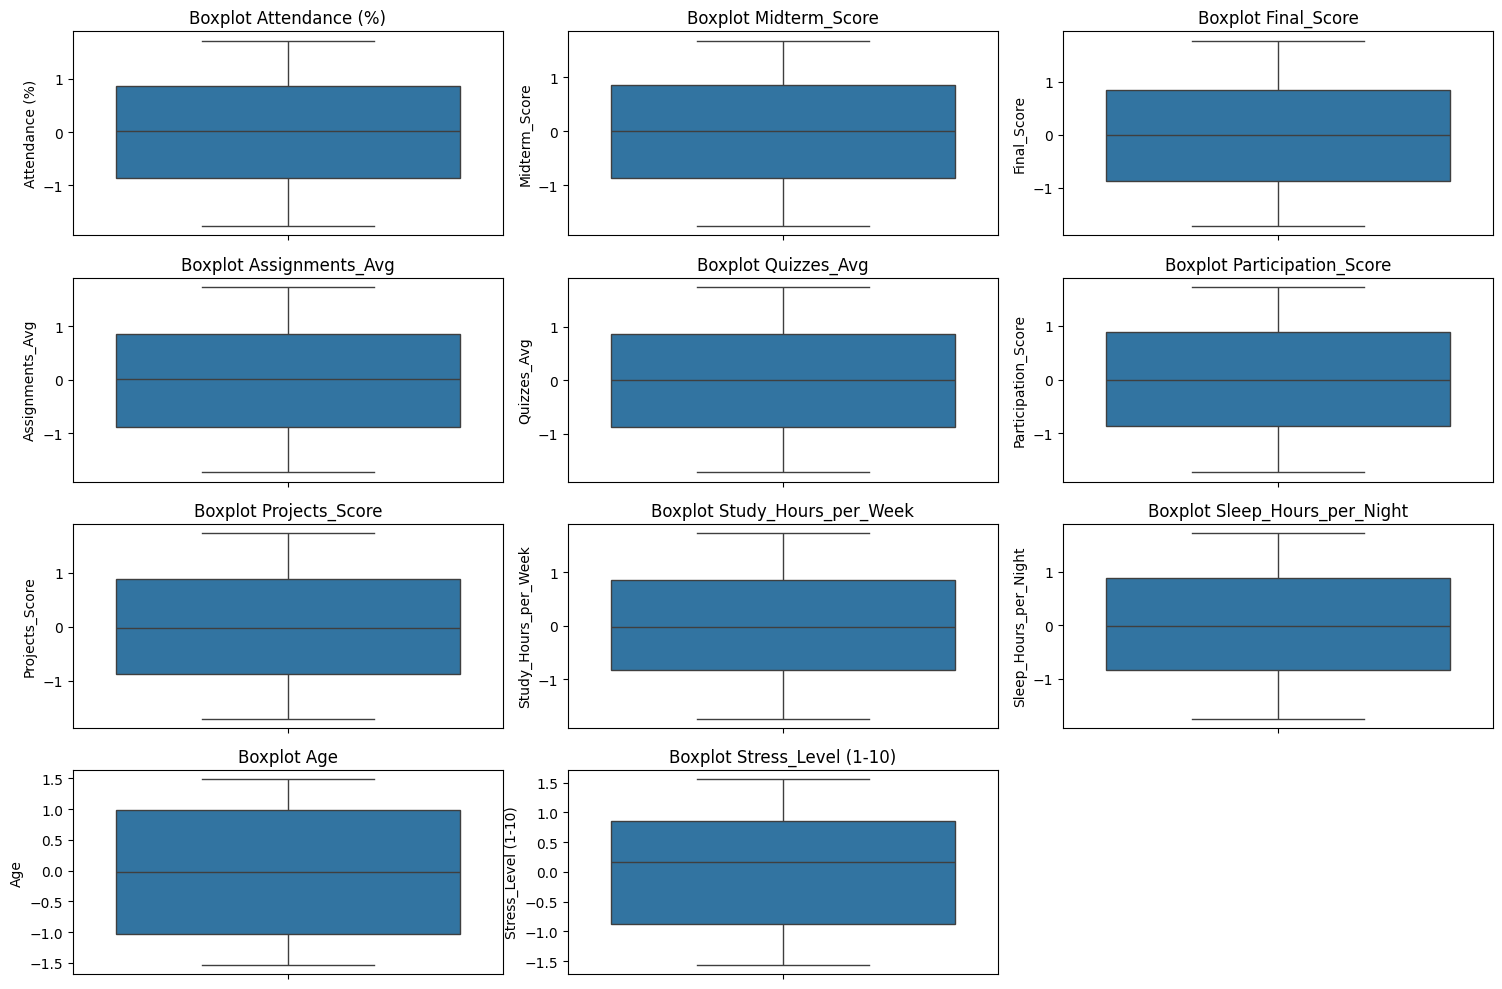

In [94]:
# Visualisasi distribusi untuk mendeteksi outlier (Boxplot)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

In [95]:
# Pemeriksaan Outlier dengan IQR
outliers_iqr = {}
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    outliers_iqr[col] = {'lower_bound': lower_bound, 'upper_bound': upper_bound, 'outliers_count': len(outliers)}
    print(f"\nKolom {col}:")
    print(f"  Batas Bawah: {lower_bound:.2f}, Batas Atas: {upper_bound:.2f}")
    print(f"  Jumlah Outlier: {len(outliers)} ({len(outliers)/len(data)*100:.2f}%)")


Kolom Attendance (%):
  Batas Bawah: -3.46, Batas Atas: 3.47
  Jumlah Outlier: 0 (0.00%)

Kolom Midterm_Score:
  Batas Bawah: -3.45, Batas Atas: 3.45
  Jumlah Outlier: 0 (0.00%)

Kolom Final_Score:
  Batas Bawah: -3.43, Batas Atas: 3.40
  Jumlah Outlier: 0 (0.00%)

Kolom Assignments_Avg:
  Batas Bawah: -3.48, Batas Atas: 3.47
  Jumlah Outlier: 0 (0.00%)

Kolom Quizzes_Avg:
  Batas Bawah: -3.46, Batas Atas: 3.46
  Jumlah Outlier: 0 (0.00%)

Kolom Participation_Score:
  Batas Bawah: -3.47, Batas Atas: 3.49
  Jumlah Outlier: 0 (0.00%)

Kolom Projects_Score:
  Batas Bawah: -3.53, Batas Atas: 3.53
  Jumlah Outlier: 0 (0.00%)

Kolom Study_Hours_per_Week:
  Batas Bawah: -3.38, Batas Atas: 3.40
  Jumlah Outlier: 0 (0.00%)

Kolom Sleep_Hours_per_Night:
  Batas Bawah: -3.43, Batas Atas: 3.48
  Jumlah Outlier: 0 (0.00%)

Kolom Age:
  Batas Bawah: -4.05, Batas Atas: 4.00
  Jumlah Outlier: 0 (0.00%)

Kolom Stress_Level (1-10):
  Batas Bawah: -3.47, Batas Atas: 3.46
  Jumlah Outlier: 0 (0.00%)


In [97]:
# Pemeriksaan Outlier dengan Z-score
outliers_zscore = {}
for col in numeric_columns:
    z_scores = np.abs((data[col] - data[col].mean()) / data[col].std())
    outliers = data[z_scores > 3][col]
    outliers_zscore[col] = {'outliers_count': len(outliers)}
    print(f"\nKolom {col}:")
    print(f"  Jumlah Outlier: {len(outliers)} ({len(outliers)/len(data)*100:.2f}%)")


Kolom Attendance (%):
  Jumlah Outlier: 0 (0.00%)

Kolom Midterm_Score:
  Jumlah Outlier: 0 (0.00%)

Kolom Final_Score:
  Jumlah Outlier: 0 (0.00%)

Kolom Assignments_Avg:
  Jumlah Outlier: 0 (0.00%)

Kolom Quizzes_Avg:
  Jumlah Outlier: 0 (0.00%)

Kolom Participation_Score:
  Jumlah Outlier: 0 (0.00%)

Kolom Projects_Score:
  Jumlah Outlier: 0 (0.00%)

Kolom Study_Hours_per_Week:
  Jumlah Outlier: 0 (0.00%)

Kolom Sleep_Hours_per_Night:
  Jumlah Outlier: 0 (0.00%)

Kolom Age:
  Jumlah Outlier: 0 (0.00%)

Kolom Stress_Level (1-10):
  Jumlah Outlier: 0 (0.00%)


In [98]:
# Penanganan Outlier dengan Capping (Berdasarkan IQR)
print("Melakukan Capping Outlier dengan Batas IQR:")
data_capped = data.copy()
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_capped[col] = data_capped[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"Capping kolom {col} pada batas [{lower_bound:.2f}, {upper_bound:.2f}]")

Melakukan Capping Outlier dengan Batas IQR:
Capping kolom Attendance (%) pada batas [-3.46, 3.47]
Capping kolom Midterm_Score pada batas [-3.45, 3.45]
Capping kolom Final_Score pada batas [-3.43, 3.40]
Capping kolom Assignments_Avg pada batas [-3.48, 3.47]
Capping kolom Quizzes_Avg pada batas [-3.46, 3.46]
Capping kolom Participation_Score pada batas [-3.47, 3.49]
Capping kolom Projects_Score pada batas [-3.53, 3.53]
Capping kolom Study_Hours_per_Week pada batas [-3.38, 3.40]
Capping kolom Sleep_Hours_per_Night pada batas [-3.43, 3.48]
Capping kolom Age pada batas [-4.05, 4.00]
Capping kolom Stress_Level (1-10) pada batas [-3.47, 3.46]


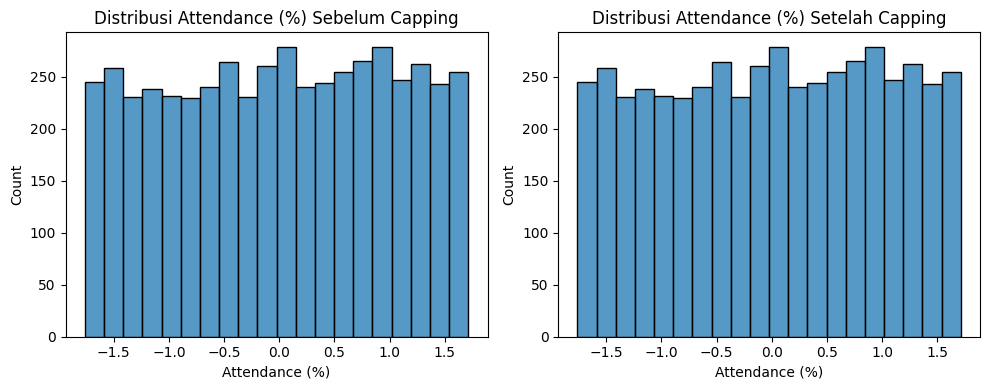

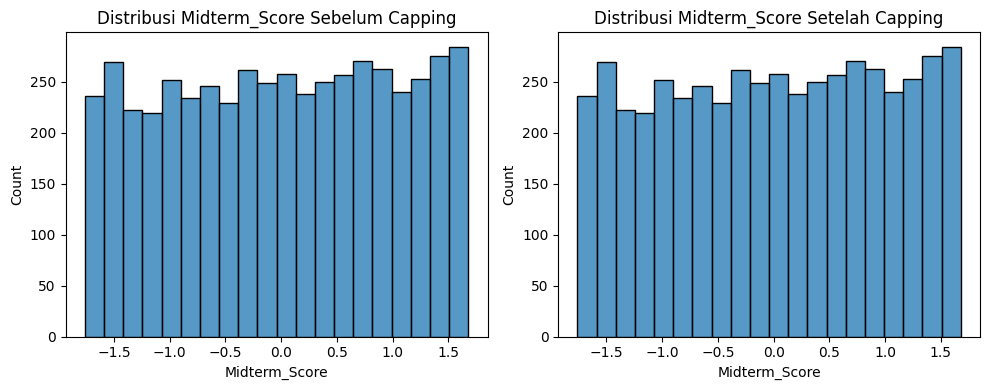

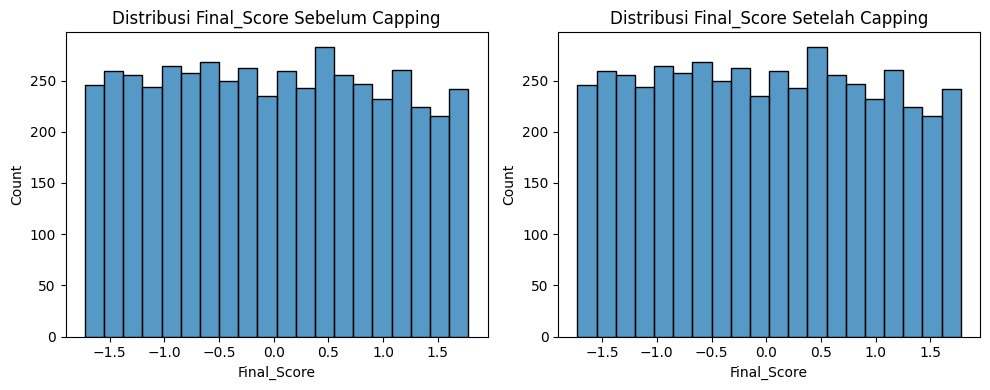

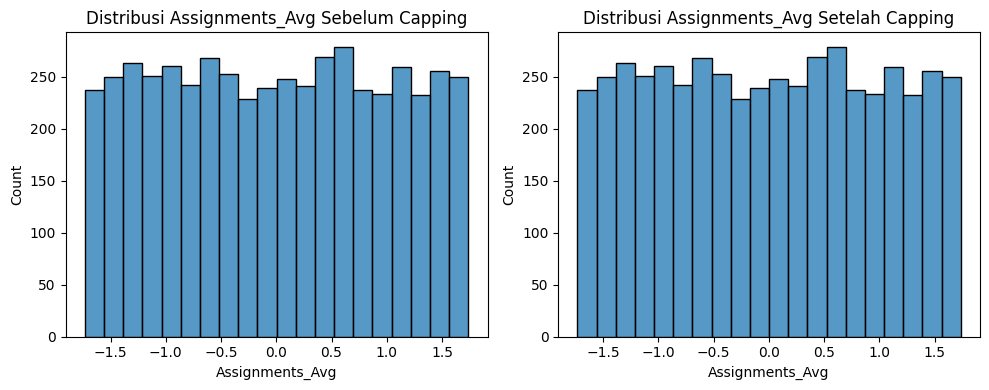

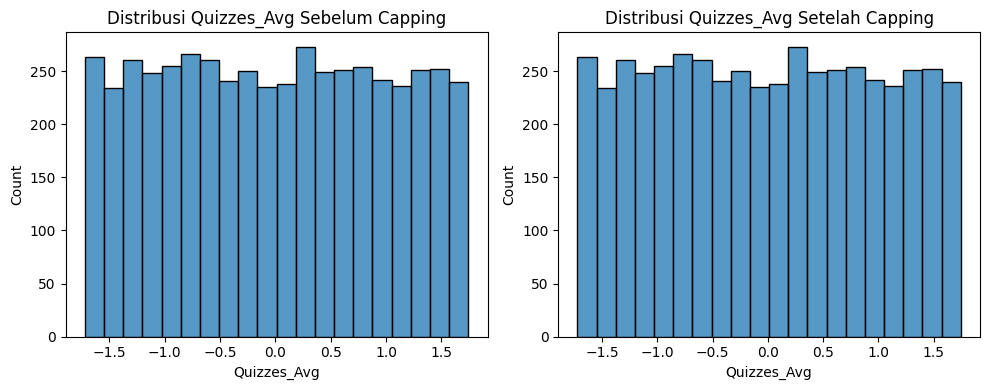

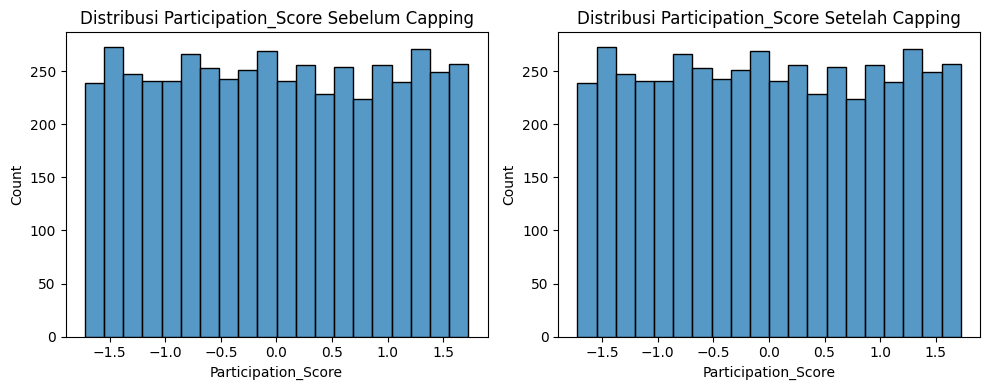

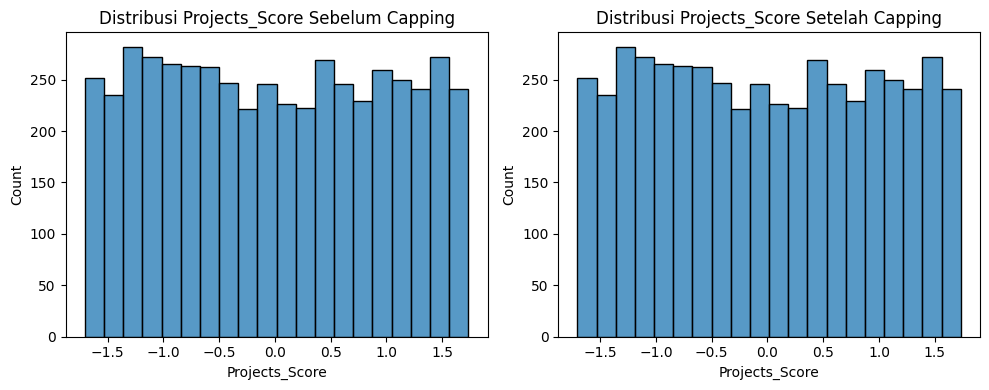

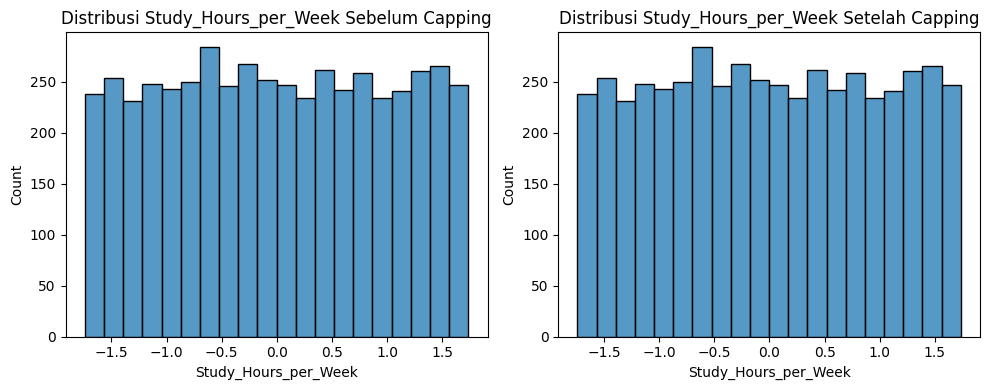

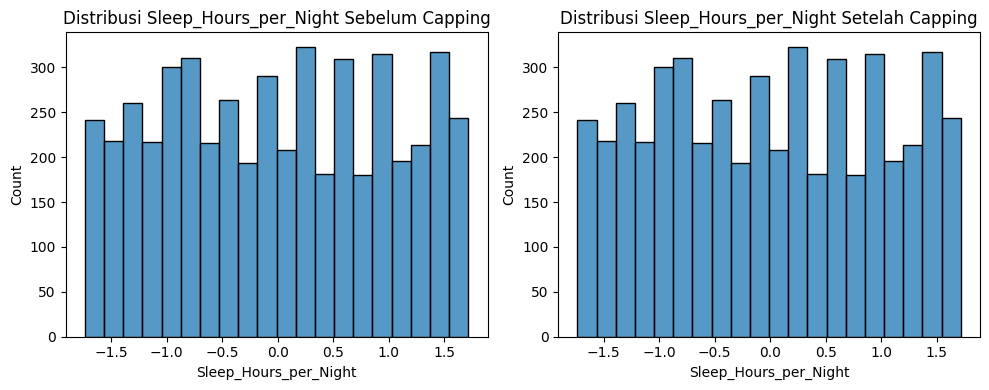

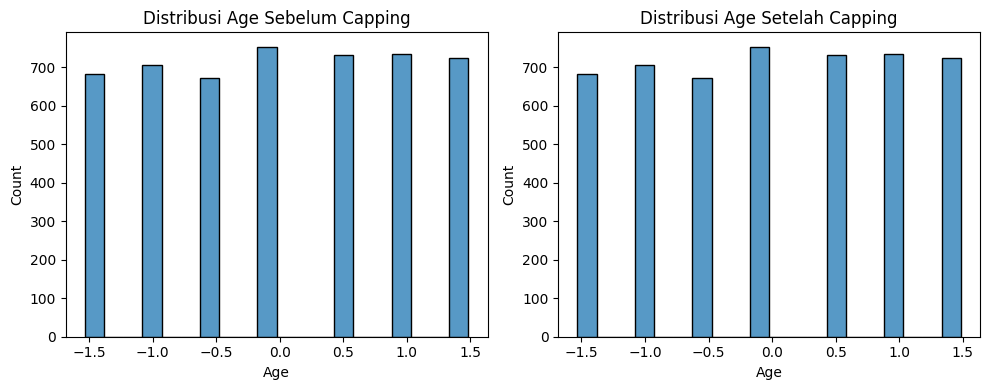

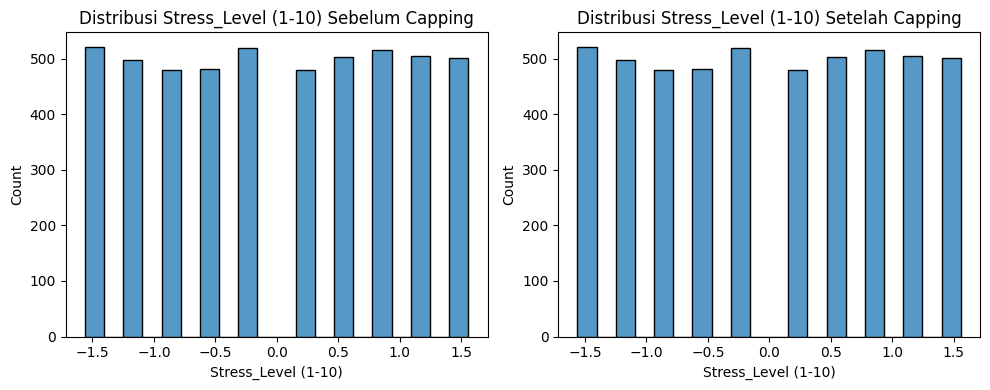

In [99]:
for col in numeric_columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], bins=20)
    plt.title(f"Distribusi {col} Sebelum Capping")
    plt.subplot(1, 2, 2)
    sns.histplot(data_capped[col], bins=20)
    plt.title(f"Distribusi {col} Setelah Capping")
    plt.tight_layout()
    plt.show()

#### Insight:

Berdasarkan pengecekan outliers diatas, terlihat bahwa tidak terdapat outliers pada setiap kolomnya, pun meski terdapat outliers, akan dihapus berdasarkan nilai IQR.

In [101]:
data_capped.to_csv("dataset/dataset_capped.csv", index=False)

### Pemilihan Fitur Awal

Tujuan

- Memilih fitur yang relevan untuk prediksi Total_Score berdasarkan kategori yang ditentukan:
  - Akademik: Attendance (%), Midterm_Score, Final_Score, Assignments_Avg, Quizzes_Avg, Participation_Score, Projects_Score.
  - Perilaku: Study_Hours_per_Week, Sleep_Hours_per_Night, Extracurricular_Activities.
  - Latar Belakang: Gender, Age, Department, Parent_Education_Level, Family_Income_Level, Internet_Access_at_Home.
  - Psikologis: Stress_Level.
- Mengidentifikasi dan menangani multikolinearitas (korelasi tinggi antar fitur, misalnya antara Midterm_Score dan Final_Score) menggunakan Pearson Correlation dan Variance Inflation Factor (VIF) untuk memastikan fitur yang dipilih tidak menyebabkan masalah pada model regresi.
- Menghasilkan dataset dengan fitur terpilih yang siap untuk pelatihan model.

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
data = pd.read_csv("dataset/dataset_capped.csv")

In [118]:
# Mendefinisikan fitur yang akan digunakan
selected_features = [
    'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 
    'Quizzes_Avg', 'Participation_Score', 'Projects_Score',  # Akademik
    'Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Extracurricular_Activities',  # Perilaku
    'Age', 'Parent_Education_Level', 'Internet_Access_at_Home',  # Latar Belakang
    'Stress_Level (1-10)'  # Psikologis
]

In [119]:
# Menambahkan kolom hasil One-Hot Encoding untuk Gender, Department, Family_Income_Level
one_hot_columns = [col for col in data.columns if col.startswith(('Gender_', 'Department_', 'Family_Income_Level_'))]
selected_features.extend(one_hot_columns)

In [120]:
# Memilih fitur dan menghapus kolom yang tidak relevan
columns_to_drop = ['Student_ID', 'First_Name', 'Last_Name', 'Email']
data_selected = data[selected_features + ['Total_Score']].copy()  # Sertakan Total_Score sebagai target

In [121]:
# Verifikasi fitur yang dipilih
print("\nFitur yang Dipilih:")
print(selected_features)
print("\nPratinjau Dataset Setelah Pemilihan Fitur (5 Baris Pertama):")
print(data_selected.head())


Fitur yang Dipilih:
['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Extracurricular_Activities', 'Age', 'Parent_Education_Level', 'Internet_Access_at_Home', 'Stress_Level (1-10)', 'Gender_Male', 'Department_CS', 'Department_Engineering', 'Department_Mathematics', 'Family_Income_Level_Low', 'Family_Income_Level_Medium']

Pratinjau Dataset Setelah Pemilihan Fitur (5 Baris Pertama):
   Attendance (%)  Midterm_Score  Final_Score  Assignments_Avg  Quizzes_Avg  \
0        1.528977      -1.725991    -0.580837        -0.087922    -1.502261   
1        1.553297      -0.770419     0.260325        -0.050429     1.622045   
2        1.679067      -1.655441    -0.332990         0.756356    -1.722058   
3        1.043960      -1.436910    -1.467594        -0.476039    -0.593952   
4       -1.108038      -1.007878    -0.454575        -0.506589     0.633999   

   Participat

In [122]:
# Analisis Korelasi dengan Pearson Correlation
print("Menghitung Matriks Korelasi Pearson untuk Fitur Numerik:")
correlation_matrix = data_selected[numeric_columns].corr(method='pearson')

Menghitung Matriks Korelasi Pearson untuk Fitur Numerik:


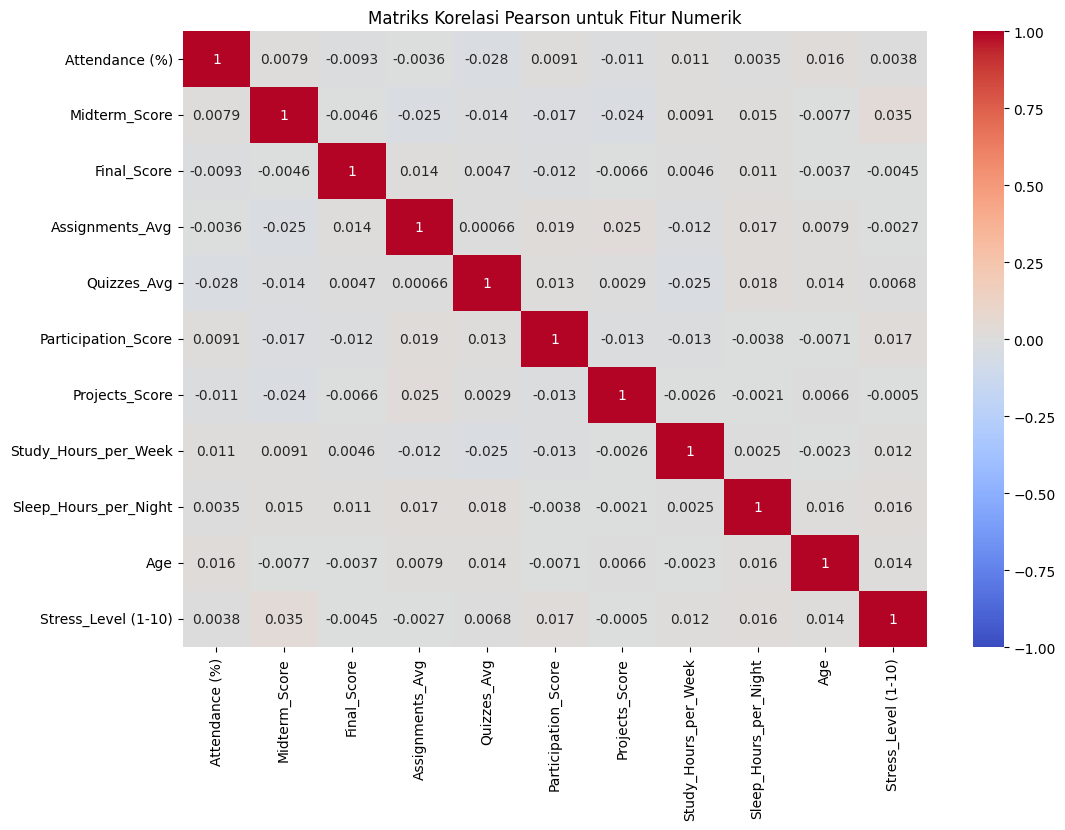

In [123]:
# Visualisasi heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Matriks Korelasi Pearson untuk Fitur Numerik")
plt.show()

In [124]:
# Identifikasi pasangan fitur dengan korelasi tinggi (|r| > 0.8)
print("\nPasangan Fitur dengan Korelasi Tinggi (|r| > 0.8):")
corr_pairs = correlation_matrix.unstack()
high_corr = corr_pairs[(abs(corr_pairs) > 0.8) & (abs(corr_pairs) < 1.0)]
high_corr


Pasangan Fitur dengan Korelasi Tinggi (|r| > 0.8):


Series([], dtype: float64)

In [125]:
data_selected.to_csv("dataset/dataset_selected_features.csv", index=False)